In [17]:
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from keras import regularizers

In [2]:
import tensorflow as tf
import os

# Define dataset directory
dataset_dir = r"C:\Users\pasir\Desktop\PR_assignment\realwaste\realwaste-main\RealWaste"
image_size = (256, 256)  
batch_size = 32
seed = 123

# Load the dataset
full_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True,
    seed=seed
)


Found 4752 files belonging to 9 classes.


In [3]:

# Get the total number of samples
num_samples = len(full_dataset.file_paths)


# Calculate the split sizes
train_size = int(0.6 * num_samples/32)
val_size = int(0.2 * num_samples/32)
test_size = int(num_samples/32 - train_size - val_size)  


print(f"Total samples: {num_samples}")
print(f"Training samples: {train_size}")
print(f"Validation samples: {val_size}")
print(f"Test samples: {test_size}")

# Split the dataset
train_dataset = full_dataset.take(train_size)
remainder_dataset = full_dataset.skip(train_size)

val_dataset = remainder_dataset.take(val_size)
test_dataset = remainder_dataset.skip(val_size)

# Normalize pixel values 
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

# Optimize data loading
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

print(f"Total samples: {num_samples}")
print(f"Training samples: {train_size}")
print(f"Validation samples: {val_size}")
print(f"Test samples: {test_size}")


Total samples: 4752
Training samples: 89
Validation samples: 29
Test samples: 30
Total samples: 4752
Training samples: 89
Validation samples: 29
Test samples: 30


Classes: ['Cardboard', 'Food Organics', 'Glass', 'Metal', 'Miscellaneous Trash', 'Paper', 'Plastic', 'Textile Trash', 'Vegetation']
Image batch shape: (32, 256, 256, 3)
Label batch shape: (32,)


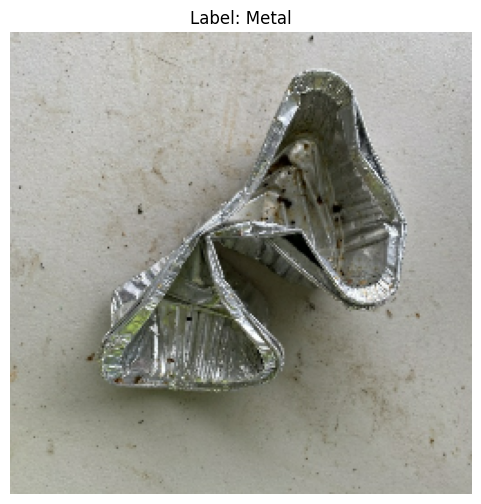

In [33]:
# Display class names
class_names = full_dataset.class_names
print("Classes:", class_names)

# Inspect a batch of images and labels
for images, labels in full_dataset.take(1):
    print(f"Image batch shape: {images.shape}")
    print(f"Label batch shape: {labels.shape}")
    image = images[0].numpy().astype("uint8")  
    label = labels[0].numpy()
# Plot the image
plt.figure(figsize=(6, 6))
plt.imshow(image)  
plt.title(f"Label: {class_names[label]}")  
plt.axis("off")  
plt.show()

In [4]:
from tensorflow.keras.applications import InceptionResNetV2, DenseNet121
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input as preprocess_densenet


# Load InceptionResNetV2 pre-trained on ImageNet
InceptionResNetV2 = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the layers of InceptionResNetV2
for layer in InceptionResNetV2.layers:
    layer.trainable = False

InceptionResNetV2_out = layers.GlobalAveragePooling2D()(InceptionResNetV2.output)
InceptionResNetV2_out = layers.Dense(128, activation='relu')(InceptionResNetV2_out)
InceptionResNetV2_out = layers.Dense(9, activation='softmax')(InceptionResNetV2_out)

InceptionResNetV2 = models.Model(inputs=InceptionResNetV2.input, outputs=InceptionResNetV2_out)

# Load DenseNet121 pre-trained on ImageNet
densenet_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze layers of DenseNet
for layer in densenet_model.layers:
    layer.trainable = False

densenet_model_out = layers.GlobalAveragePooling2D()(densenet_model.output)
densenet_model_out = layers.Dense(128, activation='relu')(densenet_model_out)
densenet_model_out = layers.Dense(9, activation='softmax')(densenet_model_out)

densenet_model = models.Model(inputs=densenet_model.input, outputs=densenet_model_out)


In [5]:
# Compile your model 
InceptionResNetV2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_InceptionResNetV2 = InceptionResNetV2.fit(train_dataset, validation_data=val_dataset, epochs=10, verbose=2)


Epoch 1/10
89/89 - 39s - loss: 1.0834 - accuracy: 0.6250 - val_loss: 0.9872 - val_accuracy: 0.6616 - 39s/epoch - 437ms/step
Epoch 2/10
89/89 - 20s - loss: 0.7057 - accuracy: 0.7472 - val_loss: 0.7549 - val_accuracy: 0.7231 - 20s/epoch - 227ms/step
Epoch 3/10
89/89 - 20s - loss: 0.6068 - accuracy: 0.7848 - val_loss: 0.8401 - val_accuracy: 0.6886 - 20s/epoch - 230ms/step
Epoch 4/10
89/89 - 23s - loss: 0.5297 - accuracy: 0.8065 - val_loss: 0.7080 - val_accuracy: 0.7468 - 23s/epoch - 258ms/step
Epoch 5/10
89/89 - 23s - loss: 0.4353 - accuracy: 0.8480 - val_loss: 0.6506 - val_accuracy: 0.7640 - 23s/epoch - 260ms/step
Epoch 6/10
89/89 - 21s - loss: 0.3853 - accuracy: 0.8638 - val_loss: 0.7315 - val_accuracy: 0.7478 - 21s/epoch - 231ms/step
Epoch 7/10
89/89 - 21s - loss: 0.3619 - accuracy: 0.8754 - val_loss: 0.7315 - val_accuracy: 0.7414 - 21s/epoch - 232ms/step
Epoch 8/10
89/89 - 21s - loss: 0.3206 - accuracy: 0.8940 - val_loss: 0.6706 - val_accuracy: 0.7726 - 21s/epoch - 232ms/step
Epoch 9/

In [6]:
# Compile the DenseNet-based model
densenet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_densenet = densenet_model.fit(train_dataset, validation_data=val_dataset, epochs=10)


Epoch 1/10
89/89 [==============================] - 22s 188ms/step - loss: 1.1492 - accuracy: 0.6106 - val_loss: 0.8437 - val_accuracy: 0.7188
Epoch 2/10
89/89 [==============================] - 15s 167ms/step - loss: 0.6647 - accuracy: 0.7739 - val_loss: 0.7478 - val_accuracy: 0.7241
Epoch 3/10
89/89 [==============================] - 15s 168ms/step - loss: 0.5292 - accuracy: 0.8174 - val_loss: 0.6494 - val_accuracy: 0.7554
Epoch 4/10
89/89 [==============================] - 15s 168ms/step - loss: 0.4270 - accuracy: 0.8581 - val_loss: 0.5959 - val_accuracy: 0.7920
Epoch 5/10
89/89 [==============================] - 15s 168ms/step - loss: 0.3735 - accuracy: 0.8792 - val_loss: 0.5456 - val_accuracy: 0.8093
Epoch 6/10
89/89 [==============================] - 15s 170ms/step - loss: 0.3272 - accuracy: 0.8940 - val_loss: 0.5485 - val_accuracy: 0.8017
Epoch 7/10
89/89 [==============================] - 16s 175ms/step - loss: 0.2801 - accuracy: 0.9185 - val_loss: 0.5305 - val_accuracy: 0.8125

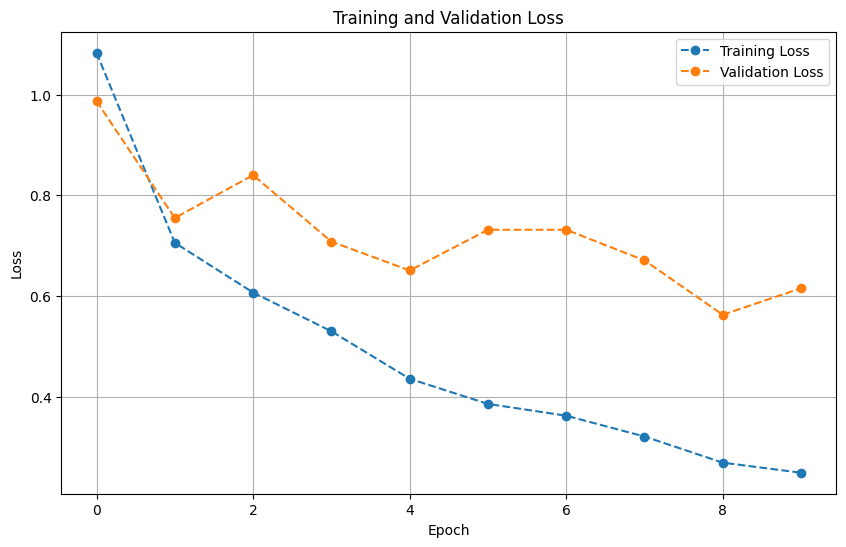

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history_InceptionResNetV2.history['loss'], label='Training Loss', linestyle='--', marker='o')
plt.plot(history_InceptionResNetV2.history['val_loss'], label='Validation Loss', linestyle='--', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


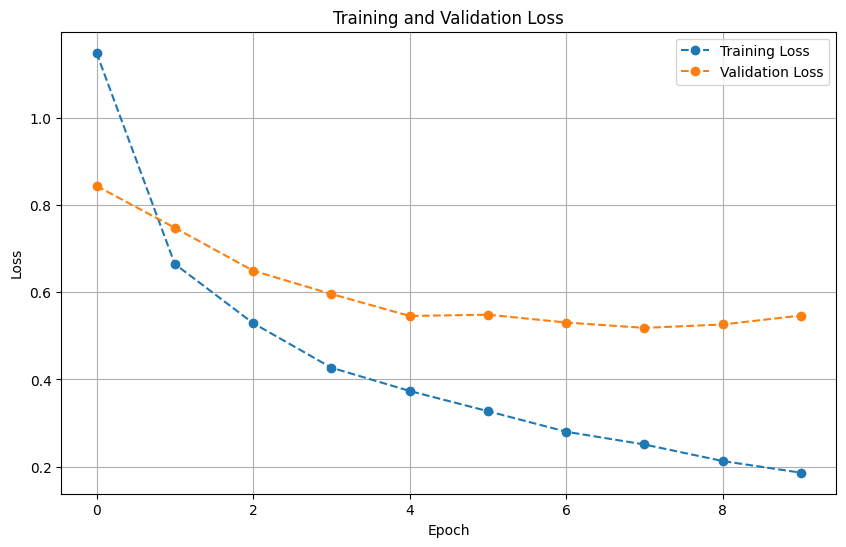

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history_densenet.history['loss'], label='Training Loss', linestyle='--', marker='o')
plt.plot(history_densenet.history['val_loss'], label='Validation Loss', linestyle='--', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
# Evaluate the model on the test data 
test_loss, test_acc = InceptionResNetV2.evaluate(test_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

31/31 [==============================] - 9s 175ms/step - loss: 0.6440 - accuracy: 0.7900
Test Loss: 0.6439794898033142
Test Accuracy: 0.7899590134620667


In [10]:
# Evaluate the model on the test data 
test_loss, test_acc = densenet_model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

31/31 [==============================] - 7s 118ms/step - loss: 0.5774 - accuracy: 0.8084
Test Loss: 0.5773702263832092
Test Accuracy: 0.8084016442298889


In [21]:
def predict_single_image(model, image_path, target_size, class_indices):
    # Load and preprocess the image
    img = load_img(image_path, target_size=target_size)  
    img_array = img_to_array(img) / 255.0               
    img_array = np.expand_dims(img_array, axis=0)       

    # Predict
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]  
    class_label = class_names[predicted_class]  
    
    # Plot the image
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted Label: {class_label}", fontsize=12, color="blue")
    plt.show()

    return class_label, predictions


1/1 [==============================] - 0s 33ms/step


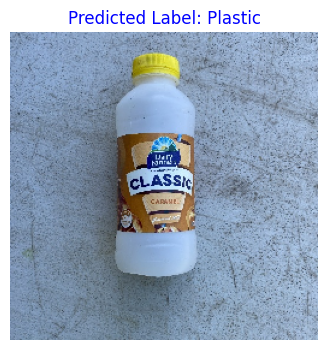

Predicted Label: Plastic


In [29]:
image_path = r"C:\Users\pasir\Desktop\PR_assignment\realwaste\realwaste-main\RealWaste\Plastic\Plastic_28.jpg"

predicted_label, probabilities = predict_single_image(densenet_model, image_path, target_size=image_size, class_indices=class_names)

print(f"Predicted Label: {predicted_label}")


1/1 [==============================] - 3s 3s/step


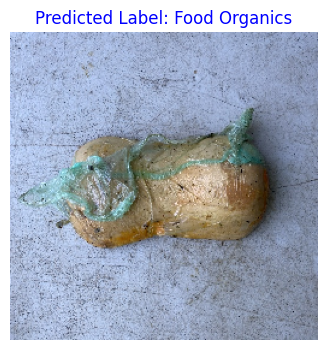

Predicted Label: Food Organics


In [30]:
image_path = r"C:\Users\pasir\Desktop\PR_assignment\realwaste\realwaste-main\RealWaste\Food Organics\Food Organics_32.jpg"

predicted_label, probabilities = predict_single_image(InceptionResNetV2, image_path, target_size=image_size, class_indices=class_names)

print(f"Predicted Label: {predicted_label}")